# Neural Networks

A neural network is a nested function of it's layers.

For example, this is a 3 layered neural network's function which returns a scalar, vector or matrix, depending on the problem:

$$
y = f_{NN}(\boldsymbol{X}) = f_{3}(\boldsymbol{f_{2}}(\boldsymbol{f_{1}}(\boldsymbol{X})))
$$

Where `f1` and `f2` are returning a vector. More generaly for the `l`th inner layer:

$$
\boldsymbol{f_{l}}(\boldsymbol{Z}) = \boldsymbol{actf_{l}}(\boldsymbol{W_{l}}\boldsymbol{Z} + \boldsymbol{b_{l}})
$$

Where `actf` is the activation function, `W` is the matrix of weights and `b` is a vector.

In [1]:
import gc
import numpy as np
from IPython.display import display
from matplotlib import pyplot as plt

### Activation functions

Text(0, 0.5, 'relu(x), tanh(x)')

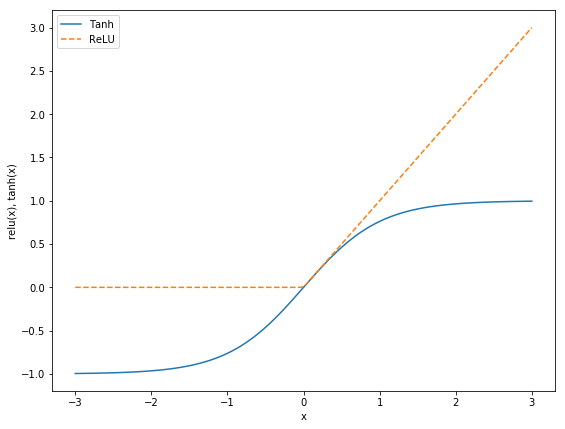

In [5]:
line = np.linspace(-3, 3, 100)
plt.figure(figsize=(9, 7))
plt.plot(line, np.tanh(line), label='Tanh')
plt.plot(line, np.maximum(line, 0), label='ReLU', linestyle='--')
plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('relu(x), tanh(x)')

Here is the code for a simple multilayer perceptron.

In [3]:
xor_data = np.array([
    [0, 0, 1],
    [0, 1, 1],
    [1, 0, 1],
    [1, 1, 1]
])
xor_target = np.array([
    [0],
    [1],
    [1],
    [0]
])

epochs = 1000
alpha = 0.1  # learning rate
hidden_layer_size = 10
X = xor_data
y = xor_target

# layers
W = [  
    2*np.random.random((X.shape[1], hidden_layer_size)) - 1,
    2*np.random.random((hidden_layer_size, y.shape[1])) - 1
]
b = [
    2*np.random.random((X.shape[0], hidden_layer_size)) - 1,
    2*np.random.random() - 1
]

# activation function
def actf(Z: np.ndarray, derivate=False) -> np.ndarray:
    if derivate:
        return Z*(1 - Z)
    return 1 / (1 + np.exp(-Z))


# start the algorithm
for epoch in range(epochs):
    
    # feed forward
    h = actf(np.dot(X, W[0]) + b[0])
    y_hat = actf(np.dot(h, W[1]) + b[1])

    # backpropagation of errors
    dW1 = (y - y_hat)*actf(y_hat, derivate=True)
    dW0 = np.dot(dW1, W[1].T)*actf(h, derivate=True)
    W[1] += alpha*np.dot(h.T, dW1)
    W[0] += alpha*np.dot(X.T, dW0)
    
    if epoch % 100 == 0:
        print('epoch:', epoch, ' loss:', round(((y - y_hat)**2).mean(), 4))

print()
prediction = y_hat.T[0]
prediction[prediction > 0.5] = 1
prediction[prediction <= 0.5] = 0

print('Prediction:\t', prediction)
print('Target:\t\t', y.T[0])
del W, b, X, y, xor_data, xor_target, epochs, alpha, hidden_layer_size, actf
gc.collect()

epoch: 0  loss: 0.2402
epoch: 100  loss: 0.1736
epoch: 200  loss: 0.1265
epoch: 300  loss: 0.0944
epoch: 400  loss: 0.073
epoch: 500  loss: 0.0583
epoch: 600  loss: 0.0479
epoch: 700  loss: 0.0403
epoch: 800  loss: 0.0346
epoch: 900  loss: 0.0301

Prediction:	 [0. 1. 1. 0.]
Target:		 [0 1 1 0]


7